In [1]:
import sys
sys.path.append('../')

In [14]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
from pipelines.experimental_modeling_pipeline import ObesityPreprocessing as OP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
op = OP("C:/Users/keimp/")
emp = EMP()

In [15]:
df = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/osteoporosis_diagnosis_dates.csv")

In [16]:
df["Date M80 first reported (osteoporosis with pathological fracture)_binary"] = df["Date M80 first reported (osteoporosis with pathological fracture)"].apply(dp.nan_to_binary)
df["Date M81 first reported (osteoporosis without pathological fracture)_binary"] = df["Date M81 first reported (osteoporosis without pathological fracture)"].apply(dp.nan_to_binary)
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary"] = df["Date M82 first reported (osteoporosis in diseases classified elsewhere)"].apply(dp.nan_to_binary)

In [17]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Blood_biomarkers.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Urine_biomarkers.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Demographics.csv"), on="Participant ID")
df = df.merge(pd.read_csv(op.medical_conditions), on="Participant ID")
df = df.merge(pd.read_csv(op.bodymeasures), on="Participant ID")
df = df.merge(pd.read_csv(op.physical_activity), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Depression.csv"), on="Participant ID")
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Diagnosis_age_assessment_center_participant.csv"), on="Participant ID")

In [19]:
df = df.merge(dp.pre_demographics_ethnicity(), on="Participant ID")
df = df.merge(dp.pre_alcohol(), on="Participant ID")

In [35]:
df = df.merge(copdp.pre_assesment(), on="Participant ID")

In [20]:
smoking_data = pd.read_csv("C:/Users/keimp/NHS/Data_files/supplementary_data/smokers_data_keimpe_participant.csv")
smoking_data = smoking_data.rename(columns={"eid": 'Participant ID', "p20161_i0":"Pack years of smoking",
                                          "p20162_i0":"Pack years adult smoking as proportion of life span exposed to smoking",
                                          "p3436_i0":"Age started smoking in current smokers",
                                          "p2867_i0":"Age started smoking in former smokers",
                                          "p3456_i0":"Number of cigarettes currently smoked daily (current cigarette smokers)",
                                          "p6183_i0":"Number of cigarettes previously smoked daily (current cigar/pipe smokers)",
                                          "p2887_i0":"Number of cigarettes previously smoked daily"})
df = df.merge(smoking_data, on="Participant ID")

In [29]:
df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Do not know", pd.np.nan)
df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Age at menopause (last menstrual period) | Instance 0'] = pd.to_numeric(df['Age at menopause (last menstrual period) | Instance 0'])

C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\1925706954.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\1925706954.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Age at menopause (last menstrual period) | Instance 0'] = df['Age at menopause (last menstrual period) | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [30]:
def menopause_binary(l):
    if str(l[1]) == 'nan':
        return pd.np.nan
    if l[0] < l[1]:
        return 1
    return 0

df["menopause_binary"] = df[['Age at recruitment','Age at menopause (last menstrual period) | Instance 0']].apply(menopause_binary, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\2357346561.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [31]:
df["menopause_binary"].value_counts()

0.0    154593
1.0         1
Name: menopause_binary, dtype: int64

In [32]:
t = df[df["menopause_binary"] ==1]
t[['Age at recruitment','Age at menopause (last menstrual period) | Instance 0']].head()

,Age at recruitment,Age at menopause (last menstrual period) | Instance 0
11425,40.0,42.0


In [104]:
df[ 'Date M80 first reported (osteoporosis with pathological fracture)_year'] = pd.DatetimeIndex(df['Date M80 first reported (osteoporosis with pathological fracture)']).year
df[ 'Date M81 first reported (osteoporosis without pathological fracture)_year'] = pd.DatetimeIndex(df['Date M81 first reported (osteoporosis without pathological fracture)']).year
df[ 'Date M82 first reported (osteoporosis in diseases classified elsewhere)_year'] = pd.DatetimeIndex(df['Date M82 first reported (osteoporosis in diseases classified elsewhere)']).year

In [95]:
df[ 'Date M80 first reported (osteoporosis with pathological fracture)_year'].dropna()[:5]

78      2002.0
203     2009.0
554     2016.0
1570    2004.0
1909    2016.0
Name: Date M80 first reported (osteoporosis with pathological fracture)_year, dtype: float64

In [96]:
def age_osteo_meno_binary(l):
    if str(l[2]) == 'nan':
        return pd.np.nan
    if str(l[1]) == 'nan':
        return pd.np.nan
    if l[0] + l[1] < l[2]:
        return 1
    if l[0] + l[1] > l[2]:
        return 0
df["age_osteo_meno_binary"] = df[['Year of birth','Age at menopause (last menstrual period) | Instance 0', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo_meno_binary, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\360252750.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\360252750.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [105]:
def age_osteo(l):
    return l[1]-l[0]
    
df["Date M80 first reported (osteoporosis with pathological fracture)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)
df["Date M81 first reported (osteoporosis without pathological fracture)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)
df["Date M82 first reported (osteoporosis in diseases classified elsewhere)_age"] = df[['Year of birth', 'Date M80 first reported (osteoporosis with pathological fracture)_year']].apply(age_osteo, axis=1)

(array([  1.,   2.,   0.,   4.,   0.,   2.,   0.,   1.,   0.,   3.,   0.,
          7.,   0.,   9.,   0.,  10.,   8.,   0.,  12.,   0.,  15.,   0.,
         11.,   0.,   8.,   0.,  24.,   0.,   7.,   0.,  20.,   0.,  26.,
         33.,   0.,  36.,   0.,  30.,   0.,  31.,   0.,  45.,   0.,  36.,
          0.,  47.,   0.,  58.,   0.,  69.,  77.,   0.,  76.,   0.,  63.,
          0.,  72.,   0.,  83.,   0.,  77.,   0.,  70.,   0.,  88.,   0.,
         93.,  94.,   0.,  68.,   0., 107.,   0.,  95.,   0., 114.,   0.,
        120.,   0., 125.,   0., 110.,   0., 116., 110.,   0., 117.,   0.,
         81.,   0.,  82.,   0.,  64.,   0.,  51.,   0.,  22.,   0.,  11.,
          1.]),
 array([32.  , 32.53, 33.06, 33.59, 34.12, 34.65, 35.18, 35.71, 36.24,
        36.77, 37.3 , 37.83, 38.36, 38.89, 39.42, 39.95, 40.48, 41.01,
        41.54, 42.07, 42.6 , 43.13, 43.66, 44.19, 44.72, 45.25, 45.78,
        46.31, 46.84, 47.37, 47.9 , 48.43, 48.96, 49.49, 50.02, 50.55,
        51.08, 51.61, 52.14, 52.67

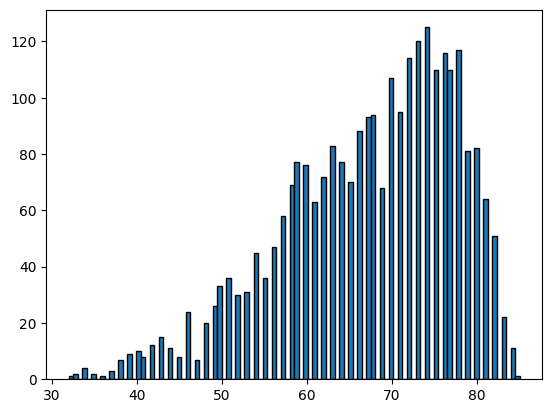

In [103]:
tdf = df[df['Date M80 first reported (osteoporosis with pathological fracture)_binary'] == 1]
plt.hist(tdf["Date M80 first reported (osteoporosis with pathological fracture)_age"], ec='black', bins=100)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         4.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  4.,  0.,  1.,  0.,  1.,
         0.,  3.,  0.,  8.,  0.,  5.,  0., 10.,  0.,  9.,  0.,  7.,  0.,
         8.,  0., 16.,  0., 11.,  0., 16.,  0., 24.,  0., 28., 29.,  0.,
        33.,  0., 18.,  0., 36.,  0., 41.,  0., 42.,  0., 45.,  0., 56.,
         0., 56.,  0., 65.,  0., 51.,  0., 76.,  0., 61.,  0., 74.,  0.,
        84.,  0., 91.,  0., 72.,  0., 82.,  0., 63.,  0., 78.,  0., 49.,
         0., 59.,  0., 42.,  0., 30.,  0.,  9.,  8.]),
 array([33.  , 33.51, 34.02, 34.53, 35.04, 35.55, 36.06, 36.57, 37.08,
        37.59, 38.1 , 38.61, 39.12, 39.63, 40.14, 40.65, 41.16, 41.67,
        42.18, 42.69, 43.2 , 43.71, 44.22, 44.73, 45.24, 45.75, 46.26,
        46.77, 47.28, 47.79, 48.3 , 48.81, 49.32, 49.83, 50.34, 50.85,
        51.36, 51.87, 52.38, 52.89, 53.4 , 53.91, 54.42, 54.93, 55.44,
        55.95, 56.46, 56.97, 57.48, 57.99, 58.5 , 59.01, 59.52, 60.03,
        

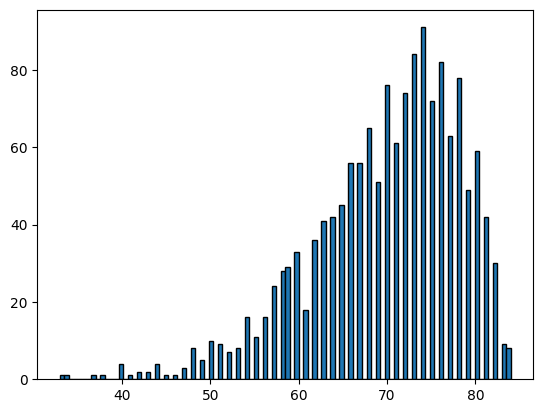

In [106]:
tdf = df[df['Date M81 first reported (osteoporosis without pathological fracture)_binary'] == 1]
plt.hist(tdf["Date M81 first reported (osteoporosis without pathological fracture)_age"], ec='black', bins=100)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([34.  , 34.43, 34.86, 35.29, 35.72, 36.15, 36.58, 37.01, 37.44,
        37.87, 38.3 , 38.73, 39.16, 39.59, 40.02, 40.45, 40.88, 41.31,
        41.74, 42.17, 42.6 , 43.03, 43.46, 43.89, 44.32, 44.75, 45.18,
        45.61, 46.04, 46.47, 46.9 , 47.33, 47.76, 48.19, 48.62, 49.05,
        49.48, 49.91, 50.34, 50.77, 51.2 , 51.63, 52.06, 52.49, 52.92,
        53.35, 53.78, 54.21, 54.64, 55.07, 55.5 , 55.93, 56.36, 56.79,
        57.22, 57.65, 58.08, 58.51, 58.94, 59.37, 59.8 , 60.23, 60.66,
        61.09, 61.52, 61.95, 62.38, 62.81, 63.24, 63.

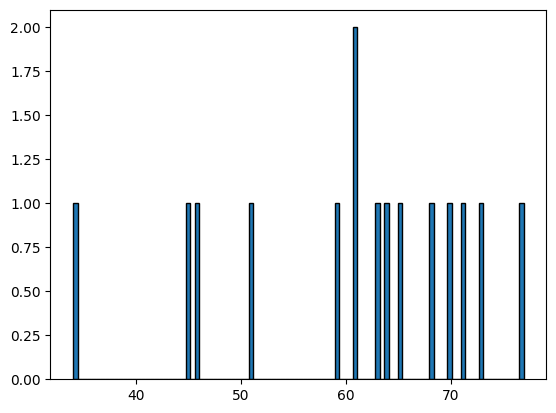

In [107]:
tdf = df[df['Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary'] == 1]
plt.hist(tdf["Date M82 first reported (osteoporosis in diseases classified elsewhere)_age"], ec='black', bins=100)

In [108]:
df['Sex'] = df['Sex'].apply(dp.sex_to_binary)

### Baseline models

In [121]:
datacolumns_selected = [
    'Summed MET minutes per week for all activity | Instance 0',
 'Summed days activity | Instance 0',
 'Summed minutes activity | Instance 0',
'Body mass index (BMI) | Instance 0',
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
'Calcium | Instance 0',
'Vitamin D | Instance 0',
 'Creatinine (enzymatic) in urine | Instance 0'
]

In [122]:
datacolumns_selected_lab = datacolumns_selected+['Date M80 first reported (osteoporosis with pathological fracture)_binary']

In [123]:
tdf = df[datacolumns_selected_lab].dropna()

cohort = pd.concat([tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                   0
Summed days activity | Instance 0                                           0
Summed minutes activity | Instance 0                                        0
Body mass index (BMI) | Instance 0                                          0
Pack years of smoking                                                       0
Alcohol intake frequency. | Instance 0_Daily or almost daily                0
Alcohol intake frequency. | Instance 0_Never                                0
Alcohol intake frequency. | Instance 0_Once or twice a week                 0
Alcohol intake frequency. | Instance 0_One to three times a month           0
Alcohol intake frequency. | Instance 0_Special occasions only               0
Alcohol intake frequency. | Instance 0_Three or four times a week           0
Sex                                                                         0
Age at recruitment                  

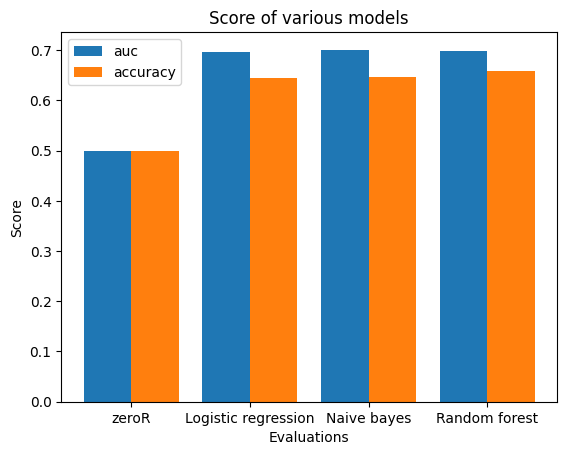

F1:  0.653386683678131 0.6366057843858159 0.6587048596376505
auc:  [0.5, 0.6963636811514039, 0.7008060678467497, 0.6983887600618519]
accuracy:  [0.5, 0.6452062714688978, 0.6468455599768731, 0.6576199707512839]


In [124]:
emp.pipeline(cohort, "Date M80 first reported (osteoporosis with pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

In [126]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LinearRegression
import scipy.stats as st 
import statsmodels.stats.api as sms

0.7060439560439561
0.7747509718172984


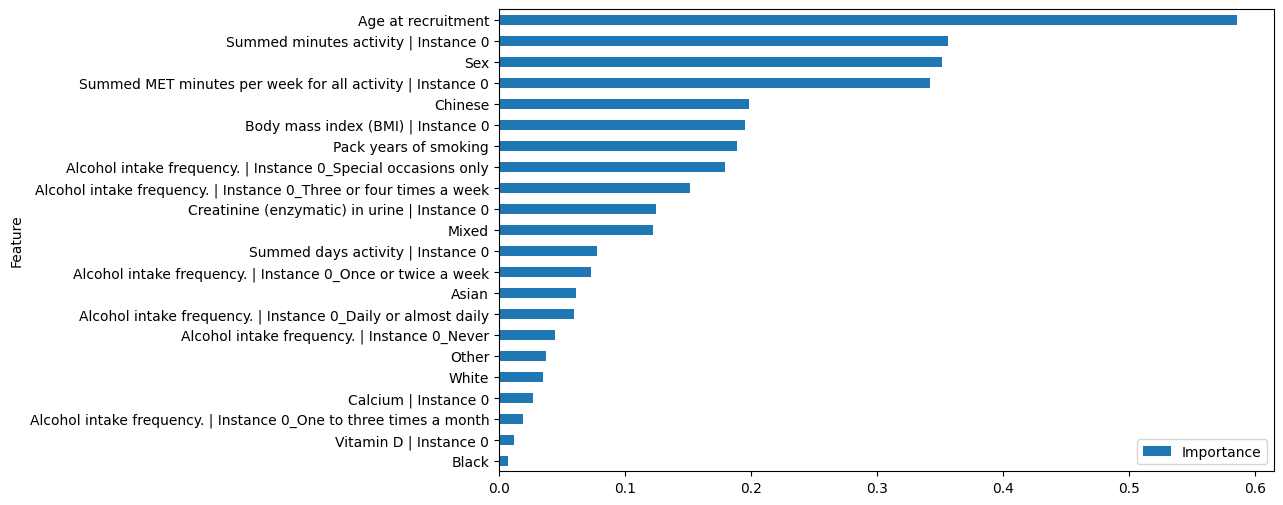

In [127]:
X = cohort[datacolumns_selected]
y = cohort['Date M80 first reported (osteoporosis with pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

#### Women only

In [128]:
tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                   0
Summed days activity | Instance 0                                           0
Summed minutes activity | Instance 0                                        0
Body mass index (BMI) | Instance 0                                          0
Pack years of smoking                                                       0
Alcohol intake frequency. | Instance 0_Daily or almost daily                0
Alcohol intake frequency. | Instance 0_Never                                0
Alcohol intake frequency. | Instance 0_Once or twice a week                 0
Alcohol intake frequency. | Instance 0_One to three times a month           0
Alcohol intake frequency. | Instance 0_Special occasions only               0
Alcohol intake frequency. | Instance 0_Three or four times a week           0
Sex                                                                         0
Age at recruitment                  

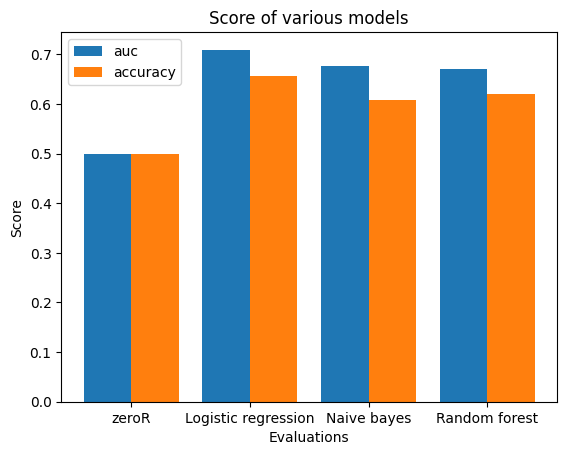

F1:  0.6609671558505236 0.5928210427151432 0.6308512519048469
auc:  [0.5, 0.7094708961398711, 0.6766629492391265, 0.6701085099111415]
accuracy:  [0.5, 0.6561145510835913, 0.6076367389060887, 0.6194100447196422]


In [129]:
emp.pipeline(cohort, "Date M80 first reported (osteoporosis with pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.6724890829694323
0.7188940092165899


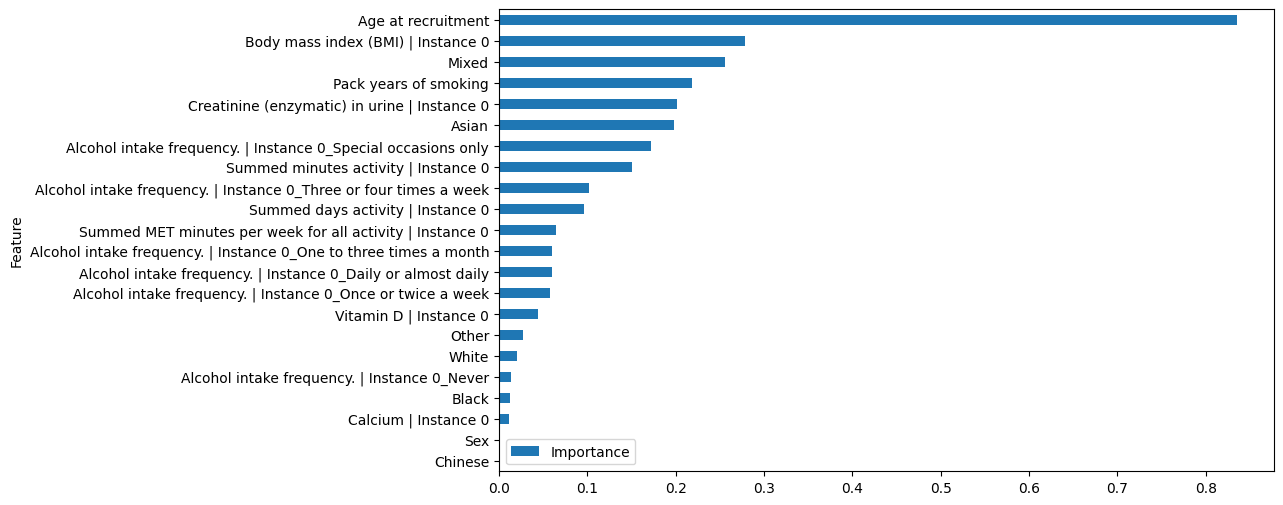

In [130]:
X = cohort[datacolumns_selected]
y = cohort['Date M80 first reported (osteoporosis with pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

#### men only

In [131]:
tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                   0
Summed days activity | Instance 0                                           0
Summed minutes activity | Instance 0                                        0
Body mass index (BMI) | Instance 0                                          0
Pack years of smoking                                                       0
Alcohol intake frequency. | Instance 0_Daily or almost daily                0
Alcohol intake frequency. | Instance 0_Never                                0
Alcohol intake frequency. | Instance 0_Once or twice a week                 0
Alcohol intake frequency. | Instance 0_One to three times a month           0
Alcohol intake frequency. | Instance 0_Special occasions only               0
Alcohol intake frequency. | Instance 0_Three or four times a week           0
Sex                                                                         0
Age at recruitment                  

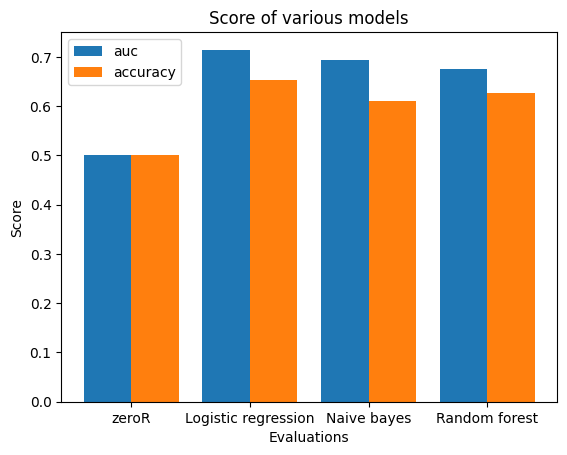

F1:  0.6637359245843956 0.5419271011588643 0.6303057788168125
auc:  [0.5, 0.7146324243623412, 0.6933419074000792, 0.674792918300536]
accuracy:  [0.5, 0.6535345717234262, 0.6114895080839353, 0.6259803921568627]


In [132]:
emp.pipeline(cohort, "Date M80 first reported (osteoporosis with pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.6637554585152838
0.7075268817204301


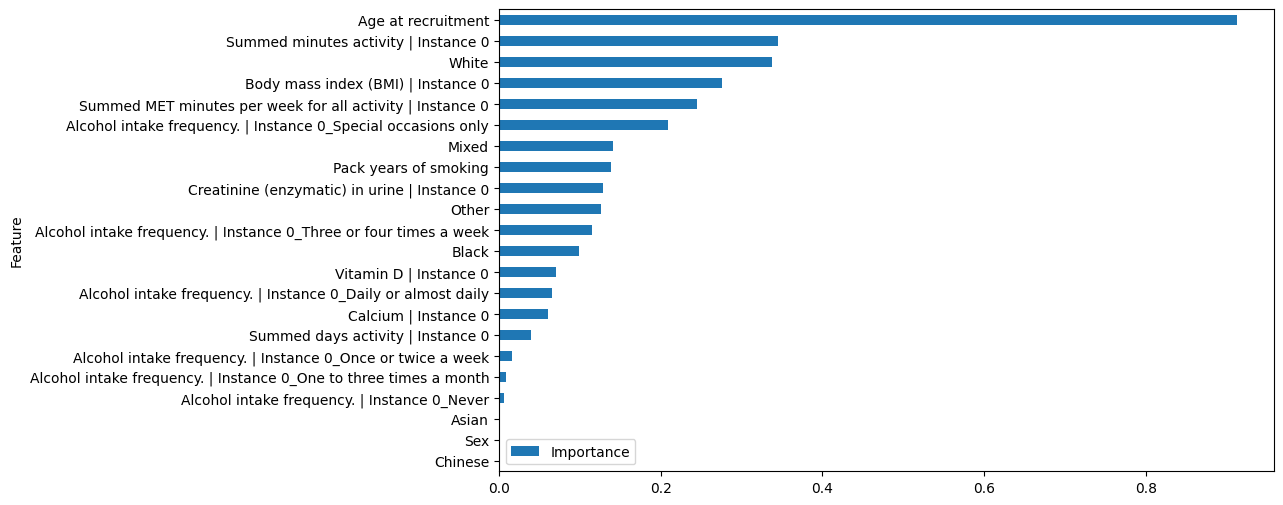

In [133]:
X = cohort[datacolumns_selected]
y = cohort['Date M80 first reported (osteoporosis with pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

### Without fracture

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                      0
Summed days activity | Instance 0                                              0
Summed minutes activity | Instance 0                                           0
Body mass index (BMI) | Instance 0                                             0
Pack years of smoking                                                          0
Alcohol intake frequency. | Instance 0_Daily or almost daily                   0
Alcohol intake frequency. | Instance 0_Never                                   0
Alcohol intake frequency. | Instance 0_Once or twice a week                    0
Alcohol intake frequency. | Instance 0_One to three times a month              0
Alcohol intake frequency. | Instance 0_Special occasions only                  0
Alcohol intake frequency. | Instance 0_Three or four times a week              0
Sex                                                                            0


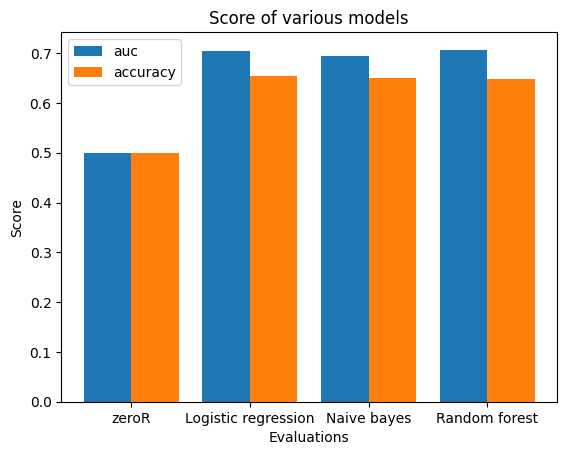

F1:  0.6681538839648593 0.685700735485607 0.6615773944796269
auc:  [0.5, 0.7043410504876291, 0.6951706708207315, 0.7070159235903888]
accuracy:  [0.5, 0.6544255689280176, 0.6502566432636009, 0.647296217283754]
0.659345584939489
0.7144078693583645


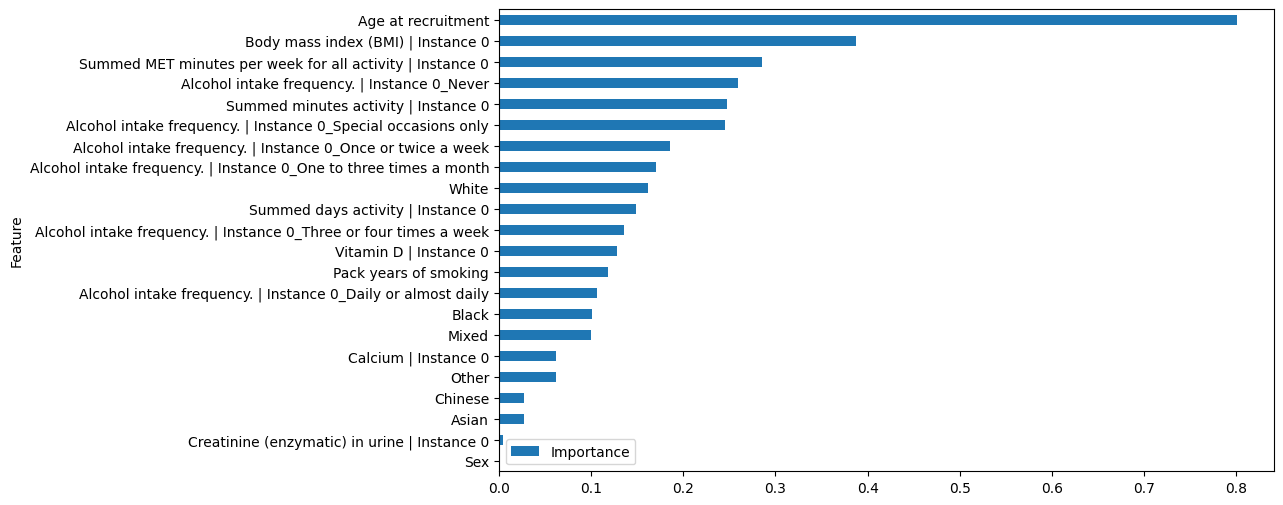

In [136]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

### Extended variable list

In [145]:
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)

df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Do not know", pd.np.nan)

df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] = df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] = df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].replace("Do not know", pd.np.nan)
df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'] =df['Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0'].apply(ap.yes_no_binairy)

df['Diabetes diagnosed by doctor | Instance 0'] = df['Diabetes diagnosed by doctor | Instance 0'].replace("Prefer not to answer", pd.np.nan)
df['Diabetes diagnosed by doctor | Instance 0'] = df['Diabetes diagnosed by doctor | Instance 0'].replace("Do not know", pd.np.nan)
df['Diabetes diagnosed by doctor | Instance 0'] =df['Diabetes diagnosed by doctor | Instance 0'].apply(ap.yes_no_binairy)

one_hot = pd.get_dummies(df['IPAQ activity group | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['Duration of strenuous sports | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['Usual walking pace | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\2001986341.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\2001986341.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_16940\2001986341.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of other exercises | Instance 0'] = df['Duration of other exercises | Instance 0'].replace("Prefer not t

In [175]:
datacolumns_selected = [
    #activity
'Summed MET minutes per week for all activity | Instance 0',
'Summed days activity | Instance 0',
'Summed minutes activity | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Brisk pace',
 'Slow pace',
 'Steady average pace',
    #body measures
'Body mass index (BMI) | Instance 0',
'Waist circumference | Instance 0',
'Hip circumference | Instance 0',
'Body fat percentage | Instance 0',
'Standing height | Instance 0',
    #lifestyle
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0',
    #demographics
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
    #biomarkers
'Calcium | Instance 0',
'Vitamin D | Instance 0',
'Creatinine (enzymatic) in urine | Instance 0',
'Haemoglobin concentration | Instance 0',

 'Albumin | Instance 0',

 'Creatinine | Instance 0',

 'C-reactive protein | Instance 0',

 'Cholesterol | Instance 0',

 'HDL cholesterol | Instance 0',

 'LDL direct | Instance 0',

 'Triglycerides | Instance 0',

 'Vitamin D | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',

 'Alanine aminotransferase | Instance 0',

 'Alkaline phosphatase | Instance 0',

 'Apolipoprotein A | Instance 0',

 'Apolipoprotein B | Instance 0',

 'Aspartate aminotransferase | Instance 0',

 'Direct bilirubin | Instance 0',

 'Gamma glutamyltransferase | Instance 0',

 'IGF-1 | Instance 0',

 'Lipoprotein A | Instance 0',

 'Phosphate | Instance 0',

 'Microalbumin in urine | Instance 0',


 'Sodium in urine | Instance 0',

 'Potassium in urine | Instance 0',
    
    #comord
'Diabetes diagnosed by doctor | Instance 0'
]

In [176]:
datacolumns_selected_lab = datacolumns_selected+['Date M80 first reported (osteoporosis with pathological fracture)_binary']

In [177]:
tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M80 first reported (osteoporosis with pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                   0
Summed days activity | Instance 0                                           0
Summed minutes activity | Instance 0                                        0
high                                                                        0
low                                                                         0
                                                                           ..
Microalbumin in urine | Instance 0                                          0
Sodium in urine | Instance 0                                                0
Potassium in urine | Instance 0                                             0
Diabetes diagnosed by doctor | Instance 0                                   0
Date M80 first reported (osteoporosis with pathological fracture)_binary    0
Length: 67, dtype: int64
Dataframe dimensions:  (134, 67)


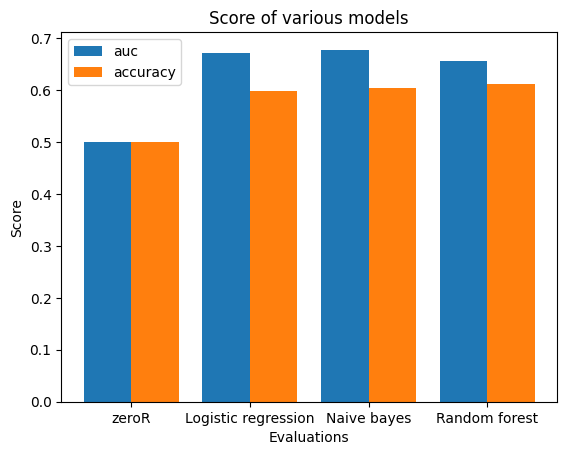

F1:  0.5752756100582188 0.5566988373944896 0.5876410256410256
auc:  [0.5, 0.6713440405748098, 0.6775993237531699, 0.6558748943364329]
accuracy:  [0.5, 0.5982905982905983, 0.6037037037037037, 0.6122507122507123]


In [178]:
emp.pipeline(cohort, "Date M80 first reported (osteoporosis with pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.7317073170731707
0.73


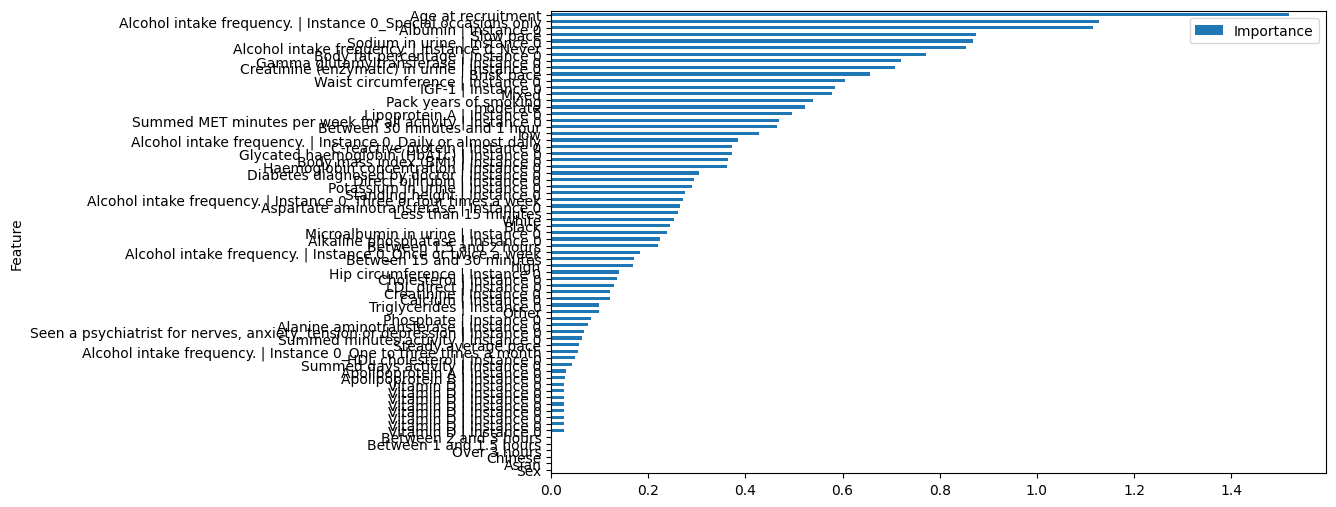

In [179]:
X = cohort[datacolumns_selected]
y = cohort['Date M80 first reported (osteoporosis with pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [180]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

In [181]:
tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                      0
Summed days activity | Instance 0                                              0
Summed minutes activity | Instance 0                                           0
high                                                                           0
low                                                                            0
                                                                              ..
Microalbumin in urine | Instance 0                                             0
Sodium in urine | Instance 0                                                   0
Potassium in urine | Instance 0                                                0
Diabetes diagnosed by doctor | Instance 0                                      0
Date M81 first reported (osteoporosis without pathological fracture)_binary    0
Length: 67, dtype: int64
Dataframe dimensions:  (1224, 67)


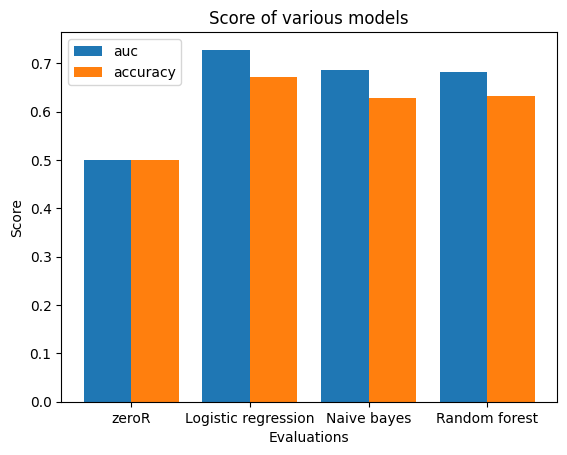

F1:  0.6734850145698386 0.5945216522251322 0.6323581336395502
auc:  [0.5, 0.7281972456918872, 0.6854968941385194, 0.6815794993478019]
accuracy:  [0.5, 0.6707627969220475, 0.6290866510538642, 0.6315423218467715]


In [182]:
emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.6521739130434783
0.7066099729416312


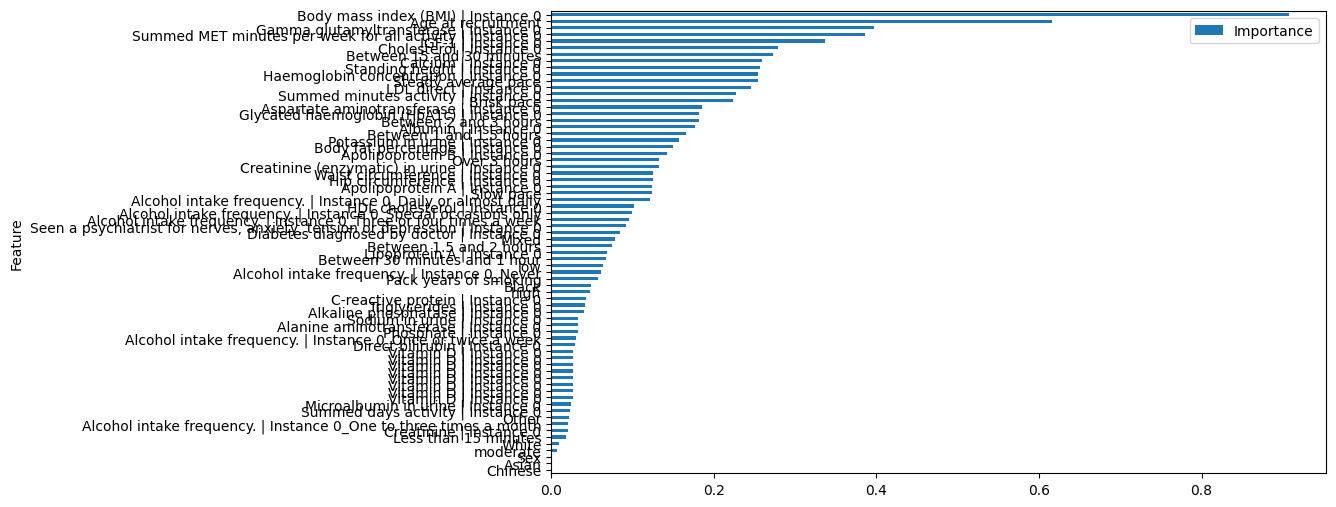

In [183]:
X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

### Top 10

In [187]:
datacolumns_selected = [
'Body mass index (BMI) | Instance 0',
 'Age at recruitment',
 'Gamma glutamyltransferase | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
 'IGF-1 | Instance 0',
 'Cholesterol | Instance 0',
     'Between 15 and 30 minutes',
'Calcium | Instance 0',
'Haemoglobin concentration | Instance 0',
'Standing height | Instance 0',
    "Sex"
]

Number of missing values: 
 Body mass index (BMI) | Instance 0                                             0
Age at recruitment                                                             0
Gamma glutamyltransferase | Instance 0                                         0
Summed MET minutes per week for all activity | Instance 0                      0
IGF-1 | Instance 0                                                             0
Cholesterol | Instance 0                                                       0
Between 15 and 30 minutes                                                      0
Calcium | Instance 0                                                           0
Haemoglobin concentration | Instance 0                                         0
Standing height | Instance 0                                                   0
Sex                                                                            0
Date M81 first reported (osteoporosis without pathological fracture)_binary    0


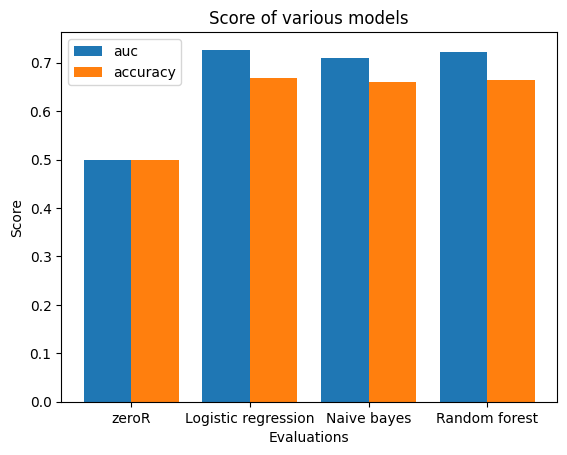

F1:  0.6839610096028708 0.6877331477444444 0.6795004963908923
auc:  [0.5, 0.726949224547596, 0.709946011083727, 0.7215878051769448]
accuracy:  [0.5, 0.6676014760147602, 0.6596678966789667, 0.6650922509225092]


In [188]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.6720787207872079
0.7319716170418785


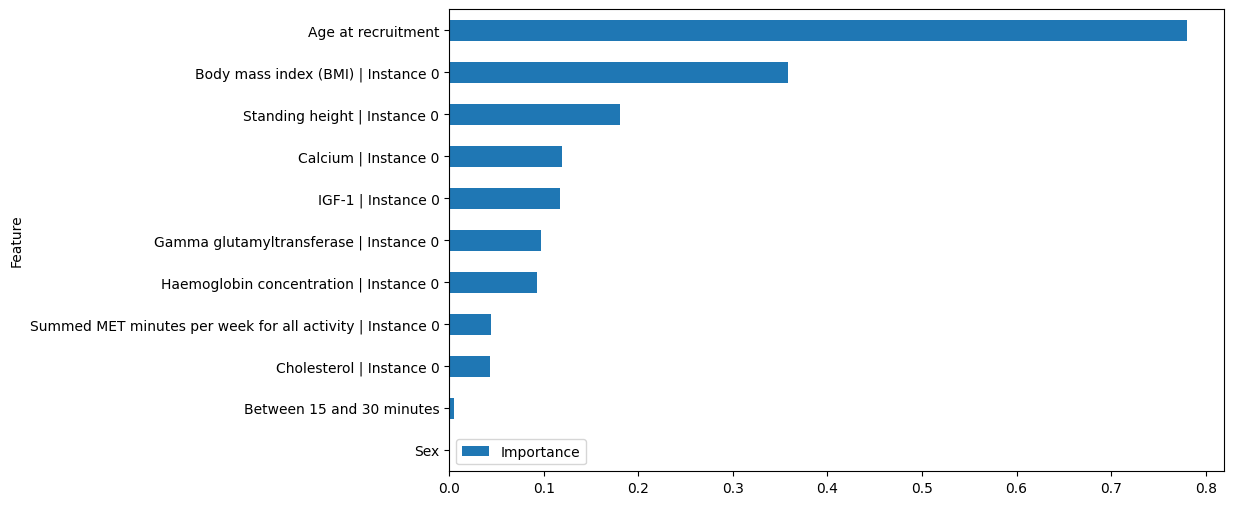

In [189]:
X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

### Time constraints

#### 5 year

In [230]:
datacolumns_selected = [
    #activity
'Summed MET minutes per week for all activity | Instance 0',
'Summed days activity | Instance 0',
'Summed minutes activity | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Brisk pace',
 'Slow pace',
 'Steady average pace',
    #body measures
'Body mass index (BMI) | Instance 0',
'Waist circumference | Instance 0',
'Hip circumference | Instance 0',
'Body fat percentage | Instance 0',
'Standing height | Instance 0',
    #lifestyle
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0',
    #demographics
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
    #biomarkers
'Calcium | Instance 0',
'Vitamin D | Instance 0',
'Creatinine (enzymatic) in urine | Instance 0',
'Haemoglobin concentration | Instance 0',

 'Albumin | Instance 0',

 'Creatinine | Instance 0',

 'C-reactive protein | Instance 0',

 'Cholesterol | Instance 0',

 'HDL cholesterol | Instance 0',

 'LDL direct | Instance 0',

 'Triglycerides | Instance 0',

 'Vitamin D | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',

 'Alanine aminotransferase | Instance 0',

 'Alkaline phosphatase | Instance 0',

 'Apolipoprotein A | Instance 0',

 'Apolipoprotein B | Instance 0',

 'Aspartate aminotransferase | Instance 0',

 'Direct bilirubin | Instance 0',

 'Gamma glutamyltransferase | Instance 0',

 'IGF-1 | Instance 0',

 'Lipoprotein A | Instance 0',

 'Phosphate | Instance 0',

 'Microalbumin in urine | Instance 0',


 'Sodium in urine | Instance 0',

 'Potassium in urine | Instance 0',
    
    #comord
'Diabetes diagnosed by doctor | Instance 0'
]

In [237]:
datacolumns_selected = [
    #activity
'Summed MET minutes per week for all activity | Instance 0',
'Summed days activity | Instance 0',
'Summed minutes activity | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Brisk pace',
 'Slow pace',
 'Steady average pace',
    #body measures
'Body mass index (BMI) | Instance 0',
'Waist circumference | Instance 0',
'Hip circumference | Instance 0',
'Body fat percentage | Instance 0',
'Standing height | Instance 0',
    #lifestyle
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0',
    #demographics
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
    #biomarkers
'Calcium | Instance 0',
'Vitamin D | Instance 0',
'Creatinine (enzymatic) in urine | Instance 0',
'Haemoglobin concentration | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',

    #comord
'Diabetes diagnosed by doctor | Instance 0'
]

In [244]:
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])
df['Date M81 first reported (osteoporosis without pathological fracture)'] = pd.to_datetime(df['Date M81 first reported (osteoporosis without pathological fracture)'])

df['diff_days'] = (df['Date M81 first reported (osteoporosis without pathological fracture)'] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

niddm_na_five = df[(df['diff_days'] < 365*5) & (df['diff_days'] > 365*0)]

In [245]:
niddm_na_five.shape

(3898, 381)

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                      0
Summed days activity | Instance 0                                              0
Summed minutes activity | Instance 0                                           0
high                                                                           0
low                                                                            0
moderate                                                                       0
Between 1 and 1.5 hours                                                        0
Between 1.5 and 2 hours                                                        0
Between 15 and 30 minutes                                                      0
Between 2 and 3 hours                                                          0
Between 30 minutes and 1 hour                                                  0
Less than 15 minutes                                                           0


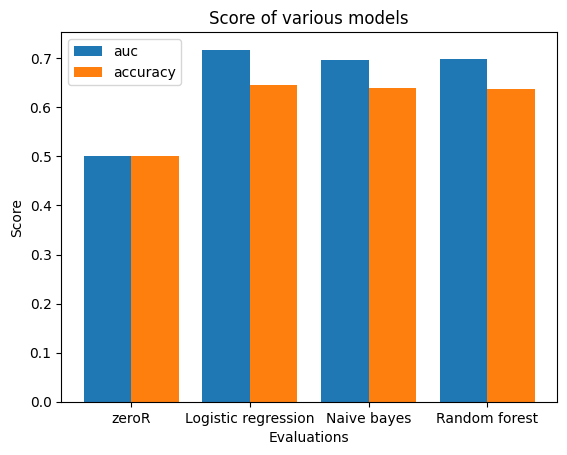

F1:  0.6522574691478132 0.6561797635213807 0.6483807871844202
auc:  [0.5, 0.7173577552262314, 0.6960226052405498, 0.698823650486827]
accuracy:  [0.5, 0.6444786269430052, 0.6402687823834197, 0.637165371329879]


In [246]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
niddm_na_five = niddm_na_five[datacolumns_selected_lab].dropna()

niddm_na_five =niddm_na_five[niddm_na_five["Sex"] ==0]
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.6470588235294118
0.7229885057471265


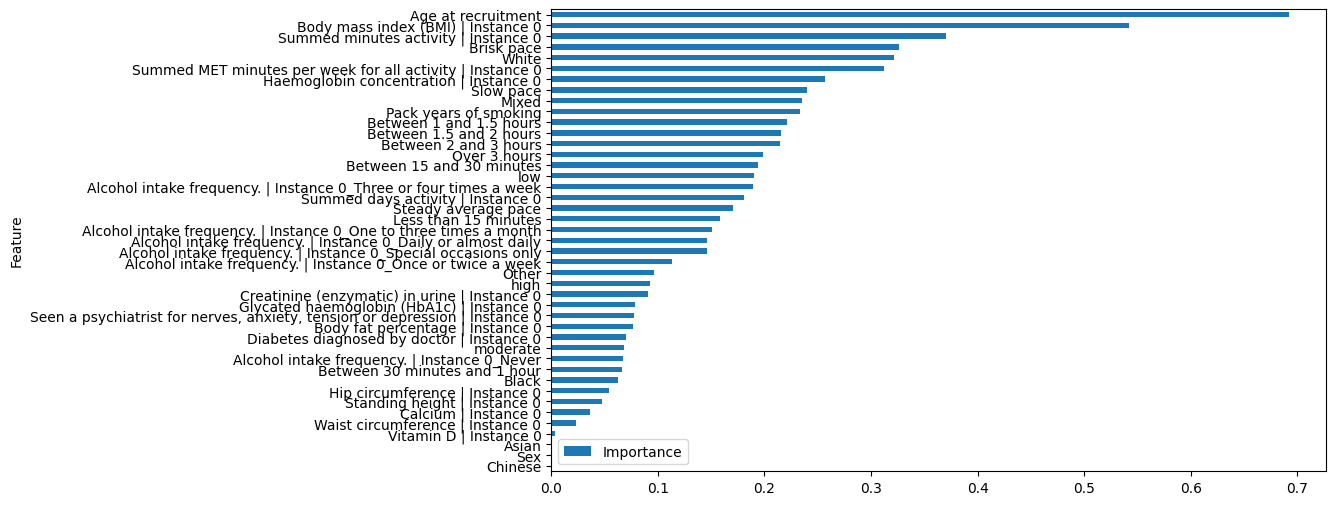

In [247]:
X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [255]:
import re

In [271]:
def thyrodism_check(i):
        if re.search("hyperthyroidism", str(i)):
            return 1
        return 0

In [272]:
df["thyroidism"] = df['Non-cancer illness code, self-reported | Instance 0'].apply(thyrodism_check)

In [273]:
def osteoarthritis_check(i):
        if re.search("osteoarthritis", str(i)):
            return 1
        return 0

In [274]:
df["osteoarthritis"] = df['Non-cancer illness code, self-reported | Instance 0'].apply(osteoarthritis_check)

In [275]:
def fracture_check(i):
        if re.search("fracture ", str(i)):
            return 1
        return 0

In [276]:
df["fracture"] = df['Non-cancer illness code, self-reported | Instance 0'].apply(fracture_check)

In [308]:
datacolumns_selected = [
    #activity
'Summed MET minutes per week for all activity | Instance 0',
'Summed days activity | Instance 0',
'Summed minutes activity | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Brisk pace',
 'Slow pace',
 'Steady average pace',
    #body measures
'Body mass index (BMI) | Instance 0',
'Waist circumference | Instance 0',
'Hip circumference | Instance 0',
'Body fat percentage | Instance 0',
'Standing height | Instance 0',
    #lifestyle
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0',
    #demographics
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
    #biomarkers
'Calcium | Instance 0',
'Vitamin D | Instance 0',
'Creatinine (enzymatic) in urine | Instance 0',
'Haemoglobin concentration | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',

    #comord
'hypertension',
 'bronchitis',
 'hypothyroidism/myxoedema',
 'peritonitis',
 'duodenal ulcer',
 'heart attack/myocardial infarction',
 'diabetes',
 'high cholesterol',
 'gastro-oesophageal reflux (gord) / gastric reflux',
 'pneumonia',
 'fracture lower leg / ankle',
 'disc problem',
 'angina',
 'cystitis',
 'anxiety/panic attacks',
 'dyspepsia / indigestion',
 'asthma',
 'kidney stone/ureter stone/bladder stone',
 'cholelithiasis/gall stones',
 'chronic fatigue syndrome',
 'chronic sinusitis',
 'hayfever/allergic rhinitis',
 'gout',
 'enlarged prostate',
 'chickenpox',
 'tuberculosis (tb)',
 'psoriasis',
 'back pain',
 'muscle or soft tissue injuries',
 'fracture metatarsal',
 'iron deficiency anaemia',
 'pulmonary embolism +/- dvt',
 'hiatus hernia',
 'migraine',
 'headaches (not migraine)',
 'heart valve problem/heart murmur',
 'multiple sclerosis',
 'spinal cord disorder',
 'prostate problem (not cancer)',
 'unclassifiable',
 'allergy or anaphylactic reaction to drug',
 'eye trauma',
 'head injury',
 'fracture skull / head',
 'optic neuritis',
 'urinary frequency / incontinence',
 'spine arthritis/spondylitis',
 'uterine fibroids',
 'depression',
 'pancreatitis',
 'glaucoma',
 'retinal detachment',
 'stomach disorder',
 'sciatica',
 'other renal/kidney problem',
 'ulcerative colitis',
 'deep venous thrombosis (dvt)',
 'allergy/hypersensitivity/anaphylaxis',
 'osteomyelitis',
 'fracture fibula',
 'fracture tibia',
 'inguinal hernia',
 'type 2 diabetes',
 'psoriatic arthropathy',
 'ear/vestibular disorder',
 'irritable bowel syndrome',
 'colitis/not crohns or ulcerative colitis',
 'myasthenia gravis {1260_1284}',
 'gestational diabetes',
 'emphysema/chronic bronchitis',
 'diverticular disease/diverticulitis',
 'hyperthyroidism/thyrotoxicosis',
 'malabsorption/coeliac disease',
 'arthritis (nos)',
 'stroke',
 'ankylosing spondylitis',
 'iritis',
 'measles / morbillivirus',
 'scarlet fever / scarlatina',
 'plantar fascitis',
 'cervical spondylosis',
 'cataract',
 'allergy or anaphylactic reaction to food',
 'osteoporosis',
 'prolapsed disc/slipped disc',
 'endometriosis',
 'oesophagitis/barretts oesophagus',
 'pleurisy',
 'urinary tract infection/kidney infection',
 'sleep apnoea',
 'cellulitis',
 'breast cysts',
 'vaginal prolapse/uterine prolapse',
 'back problem',
 'essential hypertension',
 'muscle/soft tissue problem',
 'crohns disease',
 'uterine polyps',
 'anaemia',
 'thyroid problem (not cancer)',
 'ovarian cyst or cysts',
 'subarachnoid haemorrhage',
 'fracture toe',
 'lichen planus',
 'chronic obstructive airways disease/copd',
 'oesophageal disorder',
 'other joint disorder',
 'heart arrhythmia',
 'eczema/dermatitis',
 'svt / supraventricular tachycardia',
 'menorrhagia (unknown cause)',
 'infective/viral hepatitis',
 'diabetic eye disease',
 'gall bladder disease',
 "raynaud's phenomenon/disease",
 'rheumatoid arthritis',
 'menopausal symptoms / menopause',
 'epilepsy',
 'eye infection',
 'fracture rib',
 'macular degeneration',
 'nasal/sinus disorder',
 'renal failure requiring dialysis',
 'irregular heart beat',
 'tinnitus / tiniitis',
 'joint pain',
 'ectopic pregnancy',
 'meningitis',
 'other neurological problem',
 'hepatitis',
 'tonsiltis',
 'peripheral nerve injury',
 'jaundice (unknown cause)',
 'bone disorder',
 'gestational hypertension/pre-eclampsia',
 'pleural plaques (not known asbestosis)',
 'liver/biliary/pancreas problem',
 "meniere's disease",
 'appendicitis',
 'benign breast lump',
 'fracture clavicle / collar bone',
 'retinal problem',
 'schistosomiasis/bilharzia',
 'hereditary/genetic haematological disorder',
 'dry eyes',
 'miscarriage',
 'mania/bipolar disorder/manic depression',
 'pituitary adenoma/tumour',
 'nasal polyps',
 'atrial fibrillation',
 'polymyalgia rheumatica',
 'ureteric obstruction/hydronephrosis',
 'gastric/stomach ulcers',
 'bph / benign prostatic hypertrophy',
 'abnormal smear (cervix)',
 'undescended testicle',
 'bladder problem (not cancer)',
 'transient ischaemic attack (tia)',
 'thalassaemia',
 'fracture forearm / wrist',
 'osteopenia',
 'peripheral neuropathy',
 'hepatitis a',
 'pneumothorax',
 'fracture sternum',
 'rosacea',
 'scleroderma/systemic sclerosis',
 'venous thromboembolic disease',
 'peripheral vascular disease',
 'trapped nerve/compressed nerve',
 'shingles',
 'umbilical hernia',
 'heart/cardiac problem',
 'other respiratory problems',
 'burns',
 'peripheral nerve disorder',
 'rectal or colon adenoma/polyps',
 'erectile dysfunction / impotence',
 'mumps / epidemic parotitis',
 'whooping cough / pertussis',
 'psychological/psychiatric problem',
 'cardiomyopathy',
 'neck problem/injury',
 'helicobacter pylori',
 'spinal injury',
 'cerebral aneurysm',
 'blistering/desquamating skin disorder',
 'spontaneous pneumothorax/recurrent pneumothorax',
 'blepharitis / eyelid infection',
 'eye/eyelid problem',
 'giant cell/temporal arteritis',
 'parkinsons disease',
 'other abdominal problem',
 'connective tissue disorder',
 'deliberate self-harm/suicide attempt',
 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)',
 'fracture upper arm / humerus / elbow',
 'vasculitis',
 'acromegaly',
 'anorexia/bulimia/other eating disorder',
 'joint disorder',
 'female infertility',
 "dupuytren's contracture",
 'hyperparathyroidism',
 'stress',
 'retinal artery/vein occlusion',
 'sarcoidosis',
 'disc degeneration',
 'fracture foot',
 'otosclerosis',
 'gastrointestinal bleeding',
 'polycystic kidney',
 'alcohol dependency',
 'non-infective hepatitis',
 'allergy to house dust mite',
 'benign neuroma',
 'post-natal depression',
 'low platelets/platelet disorder',
 'varicose veins',
 'gynaecological disorder (not cancer)',
 'fracture wrist / colles fracture',
 'nervous breakdown',
 'myasthenia gravis {1437_1489}',
 'bursitis',
 'fracture jaw',
 'polycystic ovaries/polycystic ovarian syndrome',
 'fracture finger',
 'polycythaemia vera',
 'fracture patella / knee',
 'carpal tunnel syndrome',
 'femoral hernia',
 'polio / poliomyelitis',
 'testicular problems (not cancer)',
 'scrotal problem (not cancer)',
 'peptic ulcer',
 'acne/acne vulgaris',
 'fracture nose',
 'fibromyalgia',
 'rheumatic fever',
 'chronic skin ulcers',
 'bronchiectasis',
 'fracture neck of femur / hip',
 'type 1 diabetes',
 'urticaria',
 'soft tissue inflammation',
 'fracture neck / cervical fracture',
 'constipation',
 'asbestosis',
 'septicaemia / sepsis',
 'anal problem',
 'gastritis/gastric erosions',
 'herpes simplex',
 'systemic lupus erythematosis/sle',
 'liver failure/cirrhosis',
 'other substance abuse/dependency',
 'renal failure not requiring dialysis',
 'schizophrenia',
 'tennis elbow / lateral epicondylitis',
 'heart failure/pulmonary odema',
 'subdural haemorrhage/haematoma',
 'haemorrhoids / piles',
 'cerebral palsy',
 'dysmenorrhoea / dysmenorrhea',
 'rectal prolapse',
 'rubella / german measles',
 'cervical polyps',
 'anal fissure',
 'dermatopolymyositis',
 "bell's palsy/facial nerve palsy",
 'malaria',
 'breast fibroadenoma',
 'neurological injury/trauma',
 'fracture pelvis',
 'food intolerance',
 'prostatitis',
 'bowel / intestinal perforation',
 'leg claudication/ intermittent claudication',
 'ovarian problem',
 'essential thrombocytosis',
 'myelofibrosis',
 "adrenocortical insufficiency/addison's disease",
 "grave's disease",
 'meningioma / benign meningeal tumour',
 'trigemminal neuralgia',
 'inflammatory bowel disease',
 'thyroid goitre',
 'pernicious anaemia',
 'insomnia',
 'scoliosis',
 'brain haemorrhage',
 'varicose ulcer',
 'disorder or pituitary gland',
 'emphysema',
 'throat or larynx disorder',
 'vocal cord polyp',
 'cholecystitis',
 'tendonitis / tendinitis / tenosynovitis',
 'cervical intra-epithelial neoplasia (cin) / precancerous cells cervix',
 'phaeochromocytoma',
 'thyroid radioablation therapy',
 'post-traumatic stress disorder',
 'myositis/myopathy',
 'pemphigoid/pemphigus',
 'fracture radius',
 'fracture ulna',
 'allergy to elastoplast',
 'incisional hernia',
 'pulmonary fibrosis',
 'uterine problem',
 'haemophilia',
 'gastroenteritis/dysentry',
 'fibrosing alveolitis/unspecified alveolitis',
 'fibrocystic disease',
 'spinal stenosis',
 'paraplegia',
 'fracture hand',
 'fracture face / orbit / eye socket',
 'cranial nerve problem/palsy',
 'hiv/aids',
 'nephritis',
 'thyroiditis',
 'clotting disorder/excessive bleeding',
 'fracture thumb',
 'bowel / intestinal obstruction',
 'aortic aneurysm',
 'oesophageal stricture',
 'aplastic anaemia',
 'breast disease (not cancer)',
 'abdominal hernia',
 'pleural effusion',
 'lymphoedema',
 'renal/kidney failure',
 'bowel / intestinal infarction',
 'brain abscess/intracranial abscess',
 'fracture shoulder / scapula',
 'vertigo',
 'labyrinthitis',
 'fracture shaft of femur',
 'dementia/alzheimers/cognitive impairment',
 'empyema',
 'polyartertis nodosa',
 'alcoholic liver disease / alcoholic cirrhosis',
 'fracture vertebra / crush fracture / vertebral collapse',
 "bowen's disease",
 'vitiligo',
 'pericardial problem',
 'other demyelinating disease (not multiple sclerosis)',
 'opioid dependency',
 'pyelonephritis',
 'chronic/degenerative neurological problem',
 "sjogren's syndrome/sicca syndrome",
 'pericarditis',
 'respiratory infection',
 'neutropenia/lymphopenia',
 'alopecia / hair loss',
 'spinal abscess',
 'acute infective polyneuritis/guillain-barre syndrome',
 'encephalitis',
 'hepatitis c',
 'aortic aneurysm rupture',
 'sickle cell disease',
 'parathyroid gland problem (not cancer)',
 'aortic regurgitation / incompetence',
 'benign / essential tremor',
 'hypopituitarism',
 'hypertrophic cardiomyopathy (hcm / hocm)',
 'stevens johnson syndrome',
 'pelvic inflammatory disease/ pid',
 'pyloric stenosis',
 'aortic stenosis',
 'myocarditis',
 'haemochromatosis',
 'arterial embolism',
 'polymyositis',
 "housemaid's knee (prepatellar bursitis)",
 'wegners granulmatosis',
 'parathyroid hyperplasia/adenoma',
 'mitral stenosis',
 'myeloproliferative disorder',
 'lichen sclerosis',
 'primary biliary cirrhosis',
 'yellow fever',
 'typhoid fever',
 'other venous/lymphatic disease',
 'bile duct obstruction/ascending cholangitis',
 'atrial flutter',
 'interstitial lung disease',
 "paget's disease",
 'pancreatic disease',
 'aortic valve disease',
 'mitral valve disease',
 'diphtheria',
 'allergy to nickel',
 'hepatitis b',
 'mitral valve prolapse',
 'lung abscess',
 'diabetic neuropathy/ulcers',
 'contact dermatitis',
 'disorder of adrenal gland',
 'dengue fever',
 'chronic laryngitis',
 'kidney nephropathy',
 'varicella zoster virus',
 'obsessive compulsive disorder (ocd)',
 'spina bifida',
 'mitral regurgitation / incompetence',
 'adrenal tumour',
 'infection of nervous system',
 'mrsa / methicillin resistant staphylococcus aureus',
 'ischaemic stroke',
 'cushings syndrome',
 'hydatiform mole',
 'wolff parkinson white / wpw syndrome',
 'sclerosing cholangitis',
 'cervical problem',
 'oesophageal varicies',
 "hyperaldosteronism/conn's syndrome",
 'monoclonal gammopathy/not myeloma',
 'motor neurone disease',
 'iga nephropathy',
 'hyperprolactinaemia',
 'male infertility',
 'glomerulnephritis',
 'alpha-1 antitrypsin deficiency',
 'cervical erosion',
 'carcinoid syndrome/tumour',
 'sick sinus syndrome',
 'pericardial effusion',
 'giardia / giardiasis',
 'retinitis pigmentosa',
 'diabetes insipidus',
 'respiratory failure',
 'dermatomyositis',
 'antiphospholipid syndrome',
 'bile duct disease',
 'aortic dissection',
 'epicondylitis',
 'diabetic nephropathy',
 'pancytopenia',
 'chlamydia',
 'benign insulinoma',
 'synovitis',
 'microscopic polyarteritis',
 'hepatitis e'
]

In [313]:
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])
df['Date M81 first reported (osteoporosis without pathological fracture)'] = pd.to_datetime(df['Date M81 first reported (osteoporosis without pathological fracture)'])

df['diff_days'] = (df['Date M81 first reported (osteoporosis without pathological fracture)'] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

niddm_na_five = df[(df['diff_days'] < 365*5) & (df['diff_days'] > 365*0)]

In [314]:
niddm_na_five.shape

(3898, 828)

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                      0
Summed days activity | Instance 0                                              0
Summed minutes activity | Instance 0                                           0
high                                                                           0
low                                                                            0
                                                                              ..
benign insulinoma                                                              0
synovitis                                                                      0
microscopic polyarteritis                                                      0
hepatitis e                                                                    0
Date M81 first reported (osteoporosis without pathological fracture)_binary    0
Length: 487, dtype: int64
Dataframe dimensions:  (962, 487)


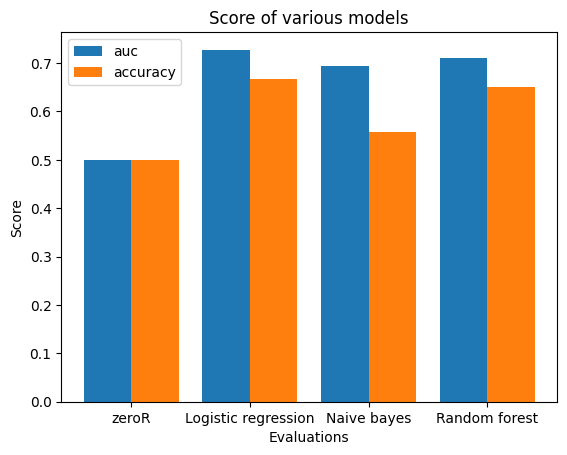

F1:  0.6731444531346081 0.30343731461419343 0.6487315983487378
auc:  [0.5, 0.7277043957617412, 0.6946402043957618, 0.7115267933848797]
accuracy:  [0.5, 0.6662726683937824, 0.5581660189982729, 0.6506584628670121]


In [315]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
niddm_na_five = niddm_na_five[datacolumns_selected_lab].dropna()

niddm_na_five =niddm_na_five[niddm_na_five["Sex"] ==0]
tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

0.5813148788927336
0.6189655172413793


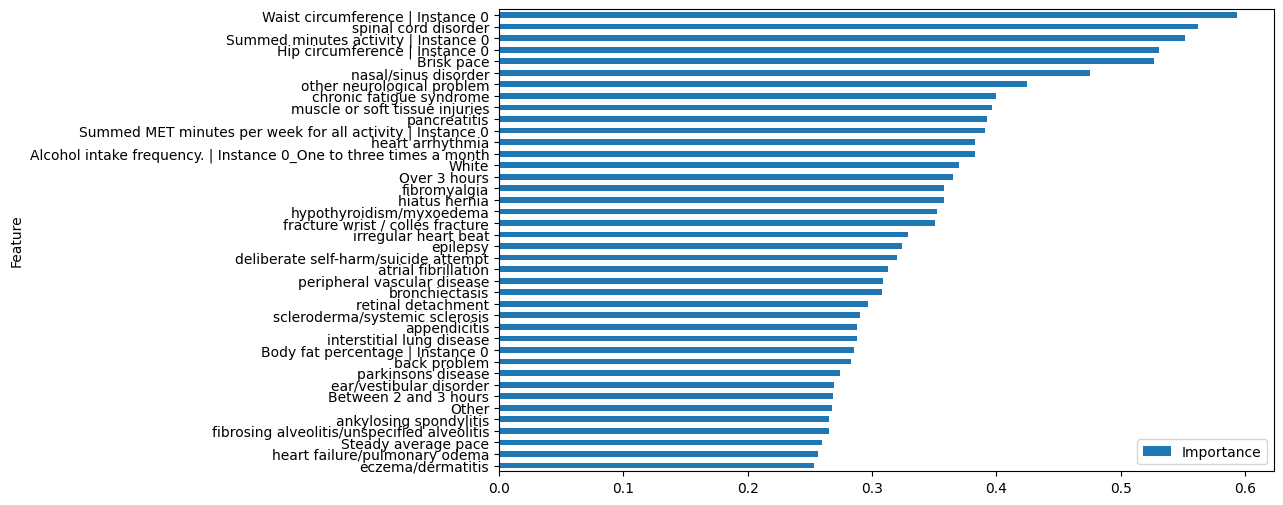

In [316]:
X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance = feature_importance.iloc[441:481,]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [320]:
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])
df['Date M81 first reported (osteoporosis without pathological fracture)'] = pd.to_datetime(df['Date M81 first reported (osteoporosis without pathological fracture)'])

df['diff_days'] = (df['Date M81 first reported (osteoporosis without pathological fracture)'] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

niddm_na_five = df[(df['diff_days'] < 365*10) & (df['diff_days'] > 365*0)]

Number of missing values: 
 eczema/dermatitis                                                              0
heart failure/pulmonary odema                                                  0
Steady average pace                                                            0
fibrosing alveolitis/unspecified alveolitis                                    0
ankylosing spondylitis                                                         0
Other                                                                          0
Between 2 and 3 hours                                                          0
ear/vestibular disorder                                                        0
parkinsons disease                                                             0
back problem                                                                   0
Body fat percentage | Instance 0                                               0
interstitial lung disease                                                      0


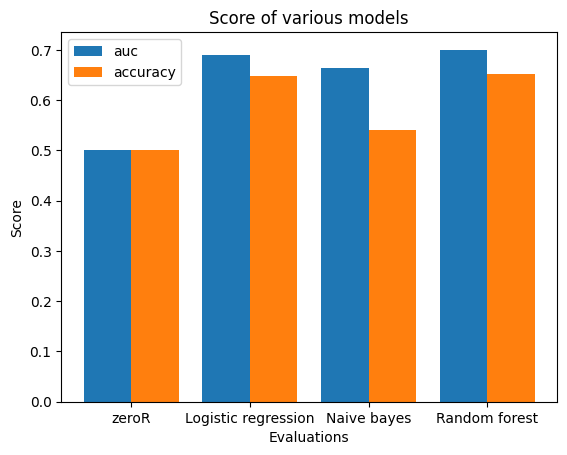

F1:  0.6707978060748297 0.3118806875802706 0.6639134047829505
auc:  [0.5, 0.6896260209618132, 0.6632221841051075, 0.7004599681849767]
accuracy:  [0.5, 0.6482223658694247, 0.5411118293471234, 0.6513251454427925]


In [321]:
datacolumns_selected_lab = feature_importance["Feature"].tolist()+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
niddm_na_five = niddm_na_five[datacolumns_selected_lab].dropna()

#niddm_na_five =niddm_na_five[niddm_na_five["Sex"] ==0]
#tdf =tdf[tdf["Sex"] ==0]

cohort = pd.concat([niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", feature_importance["Feature"].tolist(),0.25, splits=5)

In [322]:
 feature_importance["Feature"].tolist()

['eczema/dermatitis',
 'heart failure/pulmonary odema',
 'Steady average pace',
 'fibrosing alveolitis/unspecified alveolitis',
 'ankylosing spondylitis',
 'Other',
 'Between 2 and 3 hours',
 'ear/vestibular disorder',
 'parkinsons disease',
 'back problem',
 'Body fat percentage | Instance 0',
 'interstitial lung disease',
 'appendicitis',
 'scleroderma/systemic sclerosis',
 'retinal detachment',
 'bronchiectasis',
 'peripheral vascular disease',
 'atrial fibrillation',
 'deliberate self-harm/suicide attempt',
 'epilepsy',
 'irregular heart beat',
 'fracture wrist / colles fracture',
 'hypothyroidism/myxoedema',
 'hiatus hernia',
 'fibromyalgia',
 'Over 3 hours',
 'White',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'heart arrhythmia',
 'Summed MET minutes per week for all activity | Instance 0',
 'pancreatitis',
 'muscle or soft tissue injuries',
 'chronic fatigue syndrome',
 'other neurological problem',
 'nasal/sinus disorder',
 'Brisk pace',
 'Hip circum

In [344]:
def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
         
    return list

<Axes: >

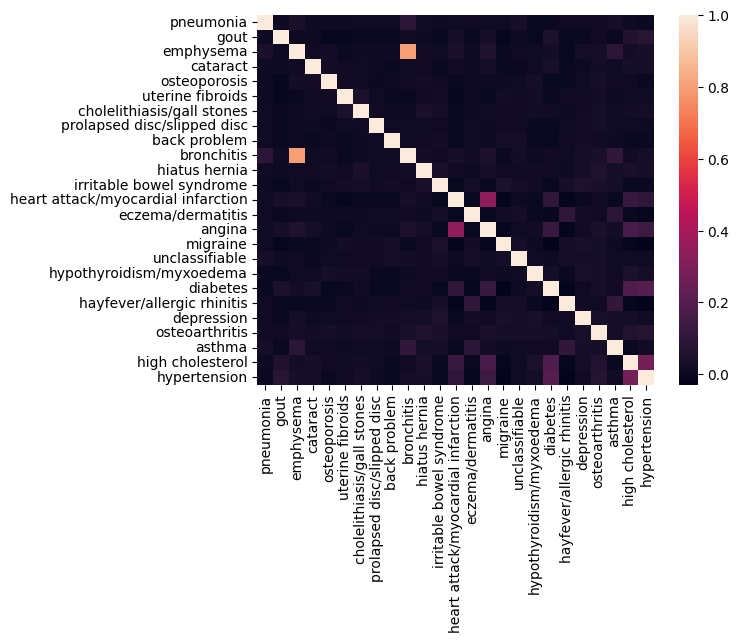

In [346]:
sns.heatmap(df[getList(res)[420:]].corr())

In [347]:
c = df[[    #comord
'hypertension',
 'bronchitis',
 'hypothyroidism/myxoedema',
 'peritonitis',
 'duodenal ulcer',
 'heart attack/myocardial infarction',
 'diabetes',
 'high cholesterol',
 'gastro-oesophageal reflux (gord) / gastric reflux',
 'pneumonia',
 'fracture lower leg / ankle',
 'disc problem',
 'angina',
 'cystitis',
 'anxiety/panic attacks',
 'dyspepsia / indigestion',
 'asthma',
 'kidney stone/ureter stone/bladder stone',
 'cholelithiasis/gall stones',
 'chronic fatigue syndrome',
 'chronic sinusitis',
 'hayfever/allergic rhinitis',
 'gout',
 'enlarged prostate',
 'chickenpox',
 'tuberculosis (tb)',
 'psoriasis',
 'back pain',
 'muscle or soft tissue injuries',
 'fracture metatarsal',
 'iron deficiency anaemia',
 'pulmonary embolism +/- dvt',
 'hiatus hernia',
 'migraine',
 'headaches (not migraine)',
 'heart valve problem/heart murmur',
 'multiple sclerosis',
 'spinal cord disorder',
 'prostate problem (not cancer)',
 'unclassifiable',
 'allergy or anaphylactic reaction to drug',
 'eye trauma',
 'head injury',
 'fracture skull / head',
 'optic neuritis',
 'urinary frequency / incontinence',
 'spine arthritis/spondylitis',
 'uterine fibroids',
 'depression',
 'pancreatitis',
 'glaucoma',
 'retinal detachment',
 'stomach disorder',
 'sciatica',
 'other renal/kidney problem',
 'ulcerative colitis',
 'deep venous thrombosis (dvt)',
 'allergy/hypersensitivity/anaphylaxis',
 'osteomyelitis',
 'fracture fibula',
 'fracture tibia',
 'inguinal hernia',
 'type 2 diabetes',
 'psoriatic arthropathy',
 'ear/vestibular disorder',
 'irritable bowel syndrome',
 'colitis/not crohns or ulcerative colitis',
 'myasthenia gravis {1260_1284}',
 'gestational diabetes',
 'emphysema/chronic bronchitis',
 'diverticular disease/diverticulitis',
 'hyperthyroidism/thyrotoxicosis',
 'malabsorption/coeliac disease',
 'arthritis (nos)',
 'stroke',
 'ankylosing spondylitis',
 'iritis',
 'measles / morbillivirus',
 'scarlet fever / scarlatina',
 'plantar fascitis',
 'cervical spondylosis',
 'cataract',
 'allergy or anaphylactic reaction to food',
 'osteoporosis',
 'prolapsed disc/slipped disc',
 'endometriosis',
 'oesophagitis/barretts oesophagus',
 'pleurisy',
 'urinary tract infection/kidney infection',
 'sleep apnoea',
 'cellulitis',
 'breast cysts',
 'vaginal prolapse/uterine prolapse',
 'back problem',
 'essential hypertension',
 'muscle/soft tissue problem',
 'crohns disease',
 'uterine polyps',
 'anaemia',
 'thyroid problem (not cancer)',
 'ovarian cyst or cysts',
 'subarachnoid haemorrhage',
 'fracture toe',
 'lichen planus',
 'chronic obstructive airways disease/copd',
 'oesophageal disorder',
 'other joint disorder',
 'heart arrhythmia',
 'eczema/dermatitis',
 'svt / supraventricular tachycardia',
 'menorrhagia (unknown cause)',
 'infective/viral hepatitis',
 'diabetic eye disease',
 'gall bladder disease',
 "raynaud's phenomenon/disease",
 'rheumatoid arthritis',
 'menopausal symptoms / menopause',
 'epilepsy',
 'eye infection',
 'fracture rib',
 'macular degeneration',
 'nasal/sinus disorder',
 'renal failure requiring dialysis',
 'irregular heart beat',
 'tinnitus / tiniitis',
 'joint pain',
 'ectopic pregnancy',
 'meningitis',
 'other neurological problem',
 'hepatitis',
 'tonsiltis',
 'peripheral nerve injury',
 'jaundice (unknown cause)',
 'bone disorder',
 'gestational hypertension/pre-eclampsia',
 'pleural plaques (not known asbestosis)',
 'liver/biliary/pancreas problem',
 "meniere's disease",
 'appendicitis',
 'benign breast lump',
 'fracture clavicle / collar bone',
 'retinal problem',
 'schistosomiasis/bilharzia',
 'hereditary/genetic haematological disorder',
 'dry eyes',
 'miscarriage',
 'mania/bipolar disorder/manic depression',
 'pituitary adenoma/tumour',
 'nasal polyps',
 'atrial fibrillation',
 'polymyalgia rheumatica',
 'ureteric obstruction/hydronephrosis',
 'gastric/stomach ulcers',
 'bph / benign prostatic hypertrophy',
 'abnormal smear (cervix)',
 'undescended testicle',
 'bladder problem (not cancer)',
 'transient ischaemic attack (tia)',
 'thalassaemia',
 'fracture forearm / wrist',
 'osteopenia',
 'peripheral neuropathy',
 'hepatitis a',
 'pneumothorax',
 'fracture sternum',
 'rosacea',
 'scleroderma/systemic sclerosis',
 'venous thromboembolic disease',
 'peripheral vascular disease',
 'trapped nerve/compressed nerve',
 'shingles',
 'umbilical hernia',
 'heart/cardiac problem',
 'other respiratory problems',
 'burns',
 'peripheral nerve disorder',
 'rectal or colon adenoma/polyps',
 'erectile dysfunction / impotence',
 'mumps / epidemic parotitis',
 'whooping cough / pertussis',
 'psychological/psychiatric problem',
 'cardiomyopathy',
 'neck problem/injury',
 'helicobacter pylori',
 'spinal injury',
 'cerebral aneurysm',
 'blistering/desquamating skin disorder',
 'spontaneous pneumothorax/recurrent pneumothorax',
 'blepharitis / eyelid infection',
 'eye/eyelid problem',
 'giant cell/temporal arteritis',
 'parkinsons disease',
 'other abdominal problem',
 'connective tissue disorder',
 'deliberate self-harm/suicide attempt',
 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)',
 'fracture upper arm / humerus / elbow',
 'vasculitis',
 'acromegaly',
 'anorexia/bulimia/other eating disorder',
 'joint disorder',
 'female infertility',
 "dupuytren's contracture",
 'hyperparathyroidism',
 'stress',
 'retinal artery/vein occlusion',
 'sarcoidosis',
 'disc degeneration',
 'fracture foot',
 'otosclerosis',
 'gastrointestinal bleeding',
 'polycystic kidney',
 'alcohol dependency',
 'non-infective hepatitis',
 'allergy to house dust mite',
 'benign neuroma',
 'post-natal depression',
 'low platelets/platelet disorder',
 'varicose veins',
 'gynaecological disorder (not cancer)',
 'fracture wrist / colles fracture',
 'nervous breakdown',
 'myasthenia gravis {1437_1489}',
 'bursitis',
 'fracture jaw',
 'polycystic ovaries/polycystic ovarian syndrome',
 'fracture finger',
 'polycythaemia vera',
 'fracture patella / knee',
 'carpal tunnel syndrome',
 'femoral hernia',
 'polio / poliomyelitis',
 'testicular problems (not cancer)',
 'scrotal problem (not cancer)',
 'peptic ulcer',
 'acne/acne vulgaris',
 'fracture nose',
 'fibromyalgia',
 'rheumatic fever',
 'chronic skin ulcers',
 'bronchiectasis',
 'fracture neck of femur / hip',
 'type 1 diabetes',
 'urticaria',
 'soft tissue inflammation',
 'fracture neck / cervical fracture',
 'constipation',
 'asbestosis',
 'septicaemia / sepsis',
 'anal problem',
 'gastritis/gastric erosions',
 'herpes simplex',
 'systemic lupus erythematosis/sle',
 'liver failure/cirrhosis',
 'other substance abuse/dependency',
 'renal failure not requiring dialysis',
 'schizophrenia',
 'tennis elbow / lateral epicondylitis',
 'heart failure/pulmonary odema',
 'subdural haemorrhage/haematoma',
 'haemorrhoids / piles',
 'cerebral palsy',
 'dysmenorrhoea / dysmenorrhea',
 'rectal prolapse',
 'rubella / german measles',
 'cervical polyps',
 'anal fissure',
 'dermatopolymyositis',
 "bell's palsy/facial nerve palsy",
 'malaria',
 'breast fibroadenoma',
 'neurological injury/trauma',
 'fracture pelvis',
 'food intolerance',
 'prostatitis',
 'bowel / intestinal perforation',
 'leg claudication/ intermittent claudication',
 'ovarian problem',
 'essential thrombocytosis',
 'myelofibrosis',
 "adrenocortical insufficiency/addison's disease",
 "grave's disease",
 'meningioma / benign meningeal tumour',
 'trigemminal neuralgia',
 'inflammatory bowel disease',
 'thyroid goitre',
 'pernicious anaemia',
 'insomnia',
 'scoliosis',
 'brain haemorrhage',
 'varicose ulcer',
 'disorder or pituitary gland',
 'emphysema',
 'throat or larynx disorder',
 'vocal cord polyp',
 'cholecystitis',
 'tendonitis / tendinitis / tenosynovitis',
 'cervical intra-epithelial neoplasia (cin) / precancerous cells cervix',
 'phaeochromocytoma',
 'thyroid radioablation therapy',
 'post-traumatic stress disorder',
 'myositis/myopathy',
 'pemphigoid/pemphigus',
 'fracture radius',
 'fracture ulna',
 'allergy to elastoplast',
 'incisional hernia',
 'pulmonary fibrosis',
 'uterine problem',
 'haemophilia',
 'gastroenteritis/dysentry',
 'fibrosing alveolitis/unspecified alveolitis',
 'fibrocystic disease',
 'spinal stenosis',
 'paraplegia',
 'fracture hand',
 'fracture face / orbit / eye socket',
 'cranial nerve problem/palsy',
 'hiv/aids',
 'nephritis',
 'thyroiditis',
 'clotting disorder/excessive bleeding',
 'fracture thumb',
 'bowel / intestinal obstruction',
 'aortic aneurysm',
 'oesophageal stricture',
 'aplastic anaemia',
 'breast disease (not cancer)',
 'abdominal hernia',
 'pleural effusion',
 'lymphoedema',
 'renal/kidney failure',
 'bowel / intestinal infarction',
 'brain abscess/intracranial abscess',
 'fracture shoulder / scapula',
 'vertigo',
 'labyrinthitis',
 'fracture shaft of femur',
 'dementia/alzheimers/cognitive impairment',
 'empyema',
 'polyartertis nodosa',
 'alcoholic liver disease / alcoholic cirrhosis',
 'fracture vertebra / crush fracture / vertebral collapse',
 "bowen's disease",
 'vitiligo',
 'pericardial problem',
 'other demyelinating disease (not multiple sclerosis)',
 'opioid dependency',
 'pyelonephritis',
 'chronic/degenerative neurological problem',
 "sjogren's syndrome/sicca syndrome",
 'pericarditis',
 'respiratory infection',
 'neutropenia/lymphopenia',
 'alopecia / hair loss',
 'spinal abscess',
 'acute infective polyneuritis/guillain-barre syndrome',
 'encephalitis',
 'hepatitis c',
 'aortic aneurysm rupture',
 'sickle cell disease',
 'parathyroid gland problem (not cancer)',
 'aortic regurgitation / incompetence',
 'benign / essential tremor',
 'hypopituitarism',
 'hypertrophic cardiomyopathy (hcm / hocm)',
 'stevens johnson syndrome',
 'pelvic inflammatory disease/ pid',
 'pyloric stenosis',
 'aortic stenosis',
 'myocarditis',
 'haemochromatosis',
 'arterial embolism',
 'polymyositis',
 "housemaid's knee (prepatellar bursitis)",
 'wegners granulmatosis',
 'parathyroid hyperplasia/adenoma',
 'mitral stenosis',
 'myeloproliferative disorder',
 'lichen sclerosis',
 'primary biliary cirrhosis',
 'yellow fever',
 'typhoid fever',
 'other venous/lymphatic disease',
 'bile duct obstruction/ascending cholangitis',
 'atrial flutter',
 'interstitial lung disease',
 "paget's disease",
 'pancreatic disease',
 'aortic valve disease',
 'mitral valve disease',
 'diphtheria',
 'allergy to nickel',
 'hepatitis b',
 'mitral valve prolapse',
 'lung abscess',
 'diabetic neuropathy/ulcers',
 'contact dermatitis',
 'disorder of adrenal gland',
 'dengue fever',
 'chronic laryngitis',
 'kidney nephropathy',
 'varicella zoster virus',
 'obsessive compulsive disorder (ocd)',
 'spina bifida',
 'mitral regurgitation / incompetence',
 'adrenal tumour',
 'infection of nervous system',
 'mrsa / methicillin resistant staphylococcus aureus',
 'ischaemic stroke',
 'cushings syndrome',
 'hydatiform mole',
 'wolff parkinson white / wpw syndrome',
 'sclerosing cholangitis',
 'cervical problem',
 'oesophageal varicies',
 "hyperaldosteronism/conn's syndrome",
 'monoclonal gammopathy/not myeloma',
 'motor neurone disease',
 'iga nephropathy',
 'hyperprolactinaemia',
 'male infertility',
 'glomerulnephritis',
 'alpha-1 antitrypsin deficiency',
 'cervical erosion',
 'carcinoid syndrome/tumour',
 'sick sinus syndrome',
 'pericardial effusion',
 'giardia / giardiasis',
 'retinitis pigmentosa',
 'diabetes insipidus',
 'respiratory failure',
 'dermatomyositis',
 'antiphospholipid syndrome',
 'bile duct disease',
 'aortic dissection',
 'epicondylitis',
 'diabetic nephropathy',
 'pancytopenia',
 'chlamydia',
 'benign insulinoma',
 'synovitis',
 'microscopic polyarteritis',
 'hepatitis e'
]].corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [355]:
len(so)

197136

In [392]:
x=22000+93
print( so[197136-x:197136-x+50])

angina                                   diabetes                                   0.121169
appendicitis                             tonsiltis                                  0.121673
tonsiltis                                appendicitis                               0.121673
high cholesterol                         heart attack/myocardial infarction         0.124045
heart attack/myocardial infarction       high cholesterol                           0.124045
type 1 diabetes                          diabetes                                   0.127124
diabetes                                 type 1 diabetes                            0.127124
cataract                                 retinal detachment                         0.130151
retinal detachment                       cataract                                   0.130151
hypertension                             angina                                     0.136835
angina                                   hypertension                 

### Subtyping

In [429]:
datacolumns_selected = [
    #activity
'Summed MET minutes per week for all activity | Instance 0',
'Summed days activity | Instance 0',
'Summed minutes activity | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Brisk pace',
 'Slow pace',
 'Steady average pace',
    #body measures
'Body mass index (BMI) | Instance 0',
'Waist circumference | Instance 0',
'Hip circumference | Instance 0',
'Body fat percentage | Instance 0',
'Standing height | Instance 0',
    #lifestyle
'Pack years of smoking',
'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
'Seen a psychiatrist for nerves, anxiety, tension or depression | Instance 0',
    #demographics
'Sex',
 'Age at recruitment',
'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
    #biomarkers
'Calcium | Instance 0',
'Vitamin D | Instance 0',
'Creatinine (enzymatic) in urine | Instance 0',
'Haemoglobin concentration | Instance 0',

 'Glycated haemoglobin (HbA1c) | Instance 0',
#co
"hiv/aids",
"rheumatoid arthritis",

'hypothyroidism/myxoedema',
'hyperthyroidism/thyrotoxicosis',
'thyroid problem (not cancer)',
'hyperparathyroidism',
'thyroid goitre',
'thyroid radioablation therapy',
'thyroiditis',
'parathyroid gland problem (not cancer)',
'parathyroid hyperplasia/adenoma',
'anorexia/bulimia/other eating disorder',
'crohns disease',
'ulcerative colitis',
'liver/biliary/pancreas problem', 
'liver failure/cirrhosis',
'alcoholic liver disease / alcoholic cirrhosis'
    
] 

In [463]:
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])
df['Date M81 first reported (osteoporosis without pathological fracture)'] = pd.to_datetime(df['Date M81 first reported (osteoporosis without pathological fracture)'])

df['diff_days'] = (df['Date M81 first reported (osteoporosis without pathological fracture)'] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

niddm_na_five = df[(df['diff_days'] < 365*8) & (df['diff_days'] > 365*2)]

Number of missing values: 
 Summed MET minutes per week for all activity | Instance 0                      0
Summed days activity | Instance 0                                              0
Summed minutes activity | Instance 0                                           0
high                                                                           0
low                                                                            0
moderate                                                                       0
Between 1 and 1.5 hours                                                        0
Between 1.5 and 2 hours                                                        0
Between 15 and 30 minutes                                                      0
Between 2 and 3 hours                                                          0
Between 30 minutes and 1 hour                                                  0
Less than 15 minutes                                                           0


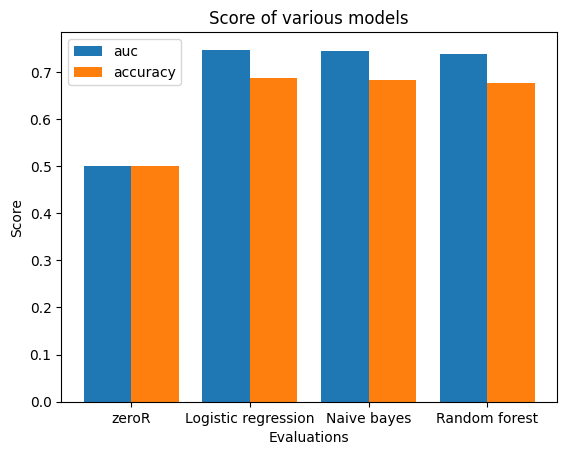

F1:  0.6889583404399292 0.6759643264392347 0.6858205328058306
auc:  [0.5, 0.746828048810673, 0.7437093141258879, 0.7381549961634613]
accuracy:  [0.5, 0.6860696517412935, 0.681592039800995, 0.6761194029850747]


In [464]:
datacolumns_selected_lab = datacolumns_selected+['Date M81 first reported (osteoporosis without pathological fracture)_binary']

tdf = df[datacolumns_selected_lab].dropna()
niddm_na_five = niddm_na_five[datacolumns_selected_lab].dropna()

niddm_na_five =niddm_na_five[(niddm_na_five['Age at recruitment'] <70) & (niddm_na_five['Age at recruitment'] >50)]
tdf =tdf[(tdf['Age at recruitment'] < 70) &(tdf['Age at recruitment'] > 50) ]

cohort = pd.concat([niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)],
                    tdf[(tdf["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 0)].sample(
                    niddm_na_five[(niddm_na_five["Date M81 first reported (osteoporosis without pathological fracture)_binary"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

emp.pipeline(cohort, "Date M81 first reported (osteoporosis without pathological fracture)_binary", datacolumns_selected,0.25, splits=5)

In [465]:
niddm_na_five = niddm_na_five[datacolumns_selected_lab].dropna()
print(niddm_na_five.shape)

(1005, 60)


0.6948590381426202
0.753257328990228


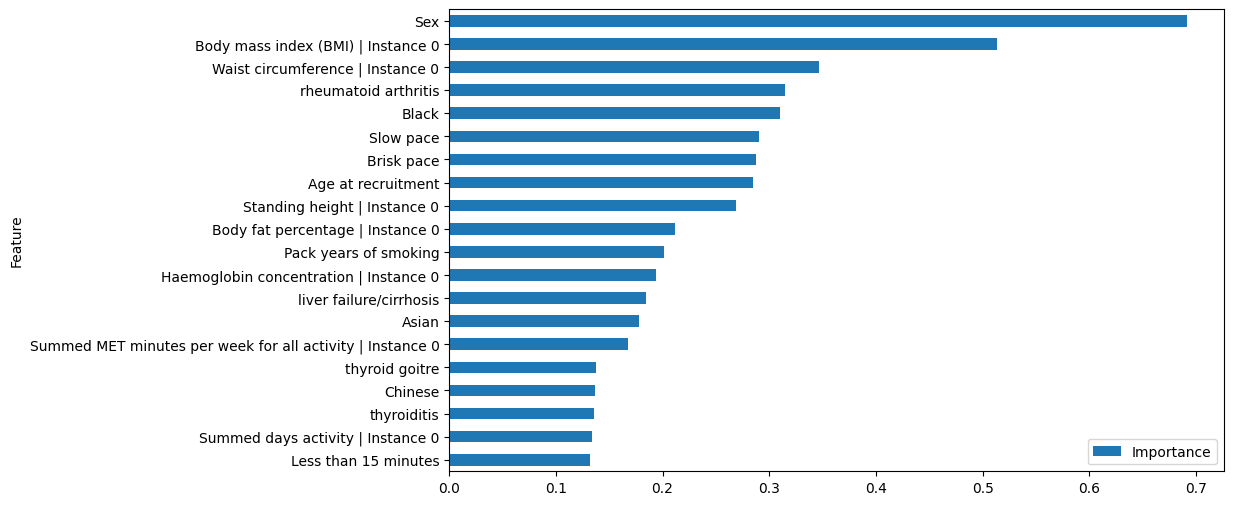

In [466]:
X = cohort[datacolumns_selected]
y = cohort['Date M81 first reported (osteoporosis without pathological fracture)_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance = feature_importance.iloc[feature_importance.shape[0]-20:feature_importance.shape[0],]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

y_pred = model.predict(X_test)
    
print(accuracy_score(y_test, y_pred))

y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [462]:
for i in df.columns.tolist():
    if re.search("liver", i):
        print(i)

liver/biliary/pancreas problem
liver failure/cirrhosis
alcoholic liver disease / alcoholic cirrhosis


#### Comorbilities

In [284]:
l = []

def get_comord(i):
    if str(i) != "nan":
        i = i.split("|")
        for j in i:
            if j not in l:
                l.append(j)
df['Non-cancer illness code, self-reported | Instance 0'].apply(get_comord)

0         None
1         None
2         None
3         None
4         None
          ... 
502350    None
502351    None
502352    None
502353    None
502354    None
Name: Non-cancer illness code, self-reported | Instance 0, Length: 502355, dtype: object

In [286]:
for i in l:
    def temp(l):
        if re.search(i, str(l)):
            return 1
        return 0
    df[i] = df['Non-cancer illness code, self-reported | Instance 0'].apply(temp)

In [331]:
res = {}
for i in l:
    res[i] = df.shape[0]-df[i].value_counts()[0]

In [333]:
res = sorted(res.items(), key=lambda x:x[1])

In [335]:
res = dict(res)

In [337]:
len(res)

445

In [250]:
df[ 'Non-cancer illness code, self-reported | Instance 0'].unique()[:50]

array(['hypertension',
       'hypertension|bronchitis|hypothyroidism/myxoedema|peritonitis|duodenal ulcer',
       'heart attack/myocardial infarction|diabetes|high cholesterol',
       'gastro-oesophageal reflux (gord) / gastric reflux',
       'pneumonia|fracture lower leg / ankle', 'disc problem', nan,
       'angina|cystitis|anxiety/panic attacks|high cholesterol|dyspepsia / indigestion',
       'hypertension|high cholesterol',
       'asthma|osteoarthritis|kidney stone/ureter stone/bladder stone',
       'hypertension|cholelithiasis/gall stones',
       'hypertension|chronic fatigue syndrome|chronic sinusitis|hayfever/allergic rhinitis',
       'gout|enlarged prostate', 'asthma',
       'osteoarthritis|hayfever/allergic rhinitis', 'asthma|bronchitis',
       'chickenpox', 'hypertension|tuberculosis (tb)|psoriasis',
       'back pain|muscle or soft tissue injuries|fracture metatarsal|iron deficiency anaemia',
       'pulmonary embolism +/- dvt|hiatus hernia|gastro-oesophageal refl

In [64]:
df[ 'Date M80 first reported (osteoporosis with pathological fracture)'].dropna()[:5]

78      2002-01-15
203     2009-11-18
554     2016-02-25
1570    2004-08-03
1909    2016-08-15
Name: Date M80 first reported (osteoporosis with pathological fracture), dtype: object

In [288]:
df.columns.tolist()

['Participant ID',
 'Date M80 first reported (osteoporosis with pathological fracture)',
 'Date M81 first reported (osteoporosis without pathological fracture)',
 'Date M82 first reported (osteoporosis in diseases classified elsewhere)',
 'Date M80 first reported (osteoporosis with pathological fracture)_binary',
 'Date M81 first reported (osteoporosis without pathological fracture)_binary',
 'Date M82 first reported (osteoporosis in diseases classified elsewhere)_binary',
 'Haemoglobin concentration | Instance 0',
 'Haemoglobin concentration | Instance 1',
 'Haemoglobin concentration | Instance 2',
 'Albumin | Instance 0',
 'Albumin | Instance 1',
 'Creatinine | Instance 0',
 'Creatinine | Instance 1',
 'C-reactive protein | Instance 0',
 'C-reactive protein | Instance 1',
 'Cholesterol | Instance 0',
 'Cholesterol | Instance 1',
 'HDL cholesterol | Instance 0',
 'HDL cholesterol | Instance 1',
 'LDL direct | Instance 0',
 'LDL direct | Instance 1',
 'Glucose | Instance 0',
 'Glucose 